# 2) Classify the Size_Categorie using SVM

In [2]:
# Importing all the necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the comma separated values file into the dataframe

In [3]:
forest = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\SVM\forestfires.csv')
forest.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [4]:
forest.shape

(517, 31)

There are 31 features and 517 instances.

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

There are no null values

In [6]:
# checking for the duplicated values 
forest.duplicated().any()

True

In [7]:
forest.duplicated().value_counts()

False    509
True       8
dtype: int64

In [8]:
Forest = forest.copy()
data = Forest.drop_duplicates()

In [9]:
# removing duplicates
data.duplicated().any()

False

In [10]:
data.shape

(509, 31)

# Data Visualisation

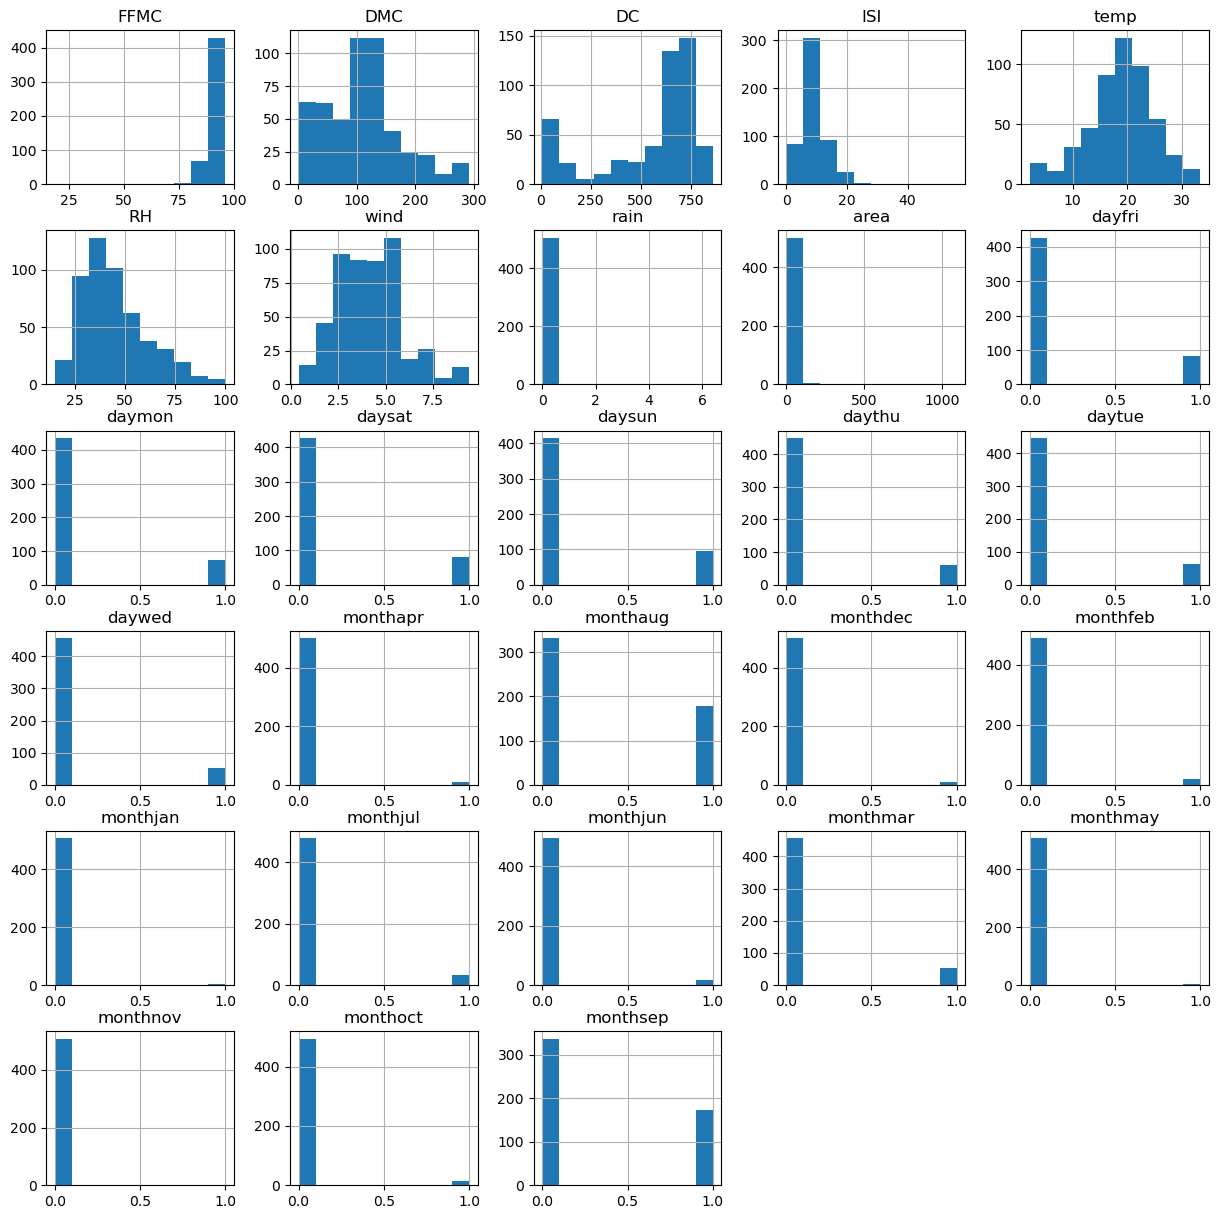

In [15]:
data.hist(figsize=(15,15))
plt.show()

# Data Pre-Processing

In [8]:
# Select columns 
selected_columns = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain','area','size_category']]

# Create a new DataFrame with the selected columns
df = pd.DataFrame(selected_columns)

In [11]:
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small


In [9]:
# encoding size_category to numeric

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])

In [13]:
df.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1


In [14]:
# count of size_category (small and large) 
df['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

# Separating features and labels

In [10]:
# Splitting data into test data and train data
X = df.drop('size_category', axis = 1)
y = data[['size_category']]

# Data Standardization

In [11]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
X

array([[-0.79603981, -1.31838569, -1.82893094, ...,  1.49437016,
        -0.06903477, -0.20279135],
       [-0.00325666, -1.1740525 ,  0.48925693, ..., -1.72936355,
        -0.06903477, -0.20279135],
       [-0.00325666, -1.04383887,  0.56104493, ..., -1.50703709,
        -0.06903477, -0.20279135],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ...,  1.49437016,
        -0.06903477, -0.02860775],
       [ 0.68141971,  0.56108339,  0.26985988, ..., -0.00633347,
        -0.06903477, -0.20279135],
       [-2.00323234, -1.68235633, -1.77892132, ...,  0.27157461,
        -0.06903477, -0.20279135]])

# Splitting into input (X) and output (y) variables

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((356, 9), (356, 1), (153, 9), (153, 1))

# Running SVM with default Hyperparameter

In [15]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# default hyperparameters
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)

Accuracy Score:
0.8169934640522876


array([[ 13,  28],
       [  0, 112]], dtype=int64)

In [16]:
# make predictions on a test set
y_pred=svc.predict(X_test)

In [17]:
y_pred    # this variable stores the predicted labels for the test set

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

## 1. Default Linear kernel

In [18]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8888888888888888


## 2. Default RBF kernel

In [19]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8169934640522876


## 3. Default Polynomial kernel

In [20]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7973856209150327


## 4. Default Sigmoid Kernel

In [21]:
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7581699346405228


# Performing K-fold cross validation with different kernels

## 1. CV on Linear kernel

In [22]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy') #cv is cross validation
print(scores)

[0.73076923 0.73076923 0.92307692 1.         1.         1.
 1.         1.         0.76923077 0.84       0.92       0.88
 0.88       0.92       0.96       0.84       0.76       0.88
 0.92       0.88      ]


In [23]:
print(scores.mean())

0.8916923076923077


## 2. CV on rbf kernel

In [24]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy') 
print(scores)

[0.73076923 0.73076923 0.73076923 0.73076923 0.73076923 0.84615385
 1.         0.96153846 0.73076923 0.84       0.84       0.8
 0.76       0.84       0.8        0.76       0.68       0.8
 0.8        0.76      ]


In [25]:
print(scores.mean())

0.7936153846153846


## 3. CV on Polynomial kernel

In [26]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy') 
print(scores)

[0.69230769 0.73076923 0.73076923 0.73076923 0.76923077 0.73076923
 0.80769231 0.88461538 0.73076923 0.92       0.88       0.72
 0.72       0.76       0.76       0.84       0.68       0.72
 0.76       0.76      ]


In [27]:
print(scores.mean())

0.7663846153846153


## 4. CV on Sigmoid kernel

In [28]:
svc=SVC(kernel='sigmoid')
scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy') 
print(scores)

[0.69230769 0.73076923 0.80769231 0.73076923 0.69230769 0.73076923
 0.92307692 0.96153846 0.69230769 0.68       0.76       0.72
 0.6        0.84       0.8        0.76       0.72       0.76
 0.68       0.72      ]


In [29]:
print(scores.mean())

0.7500769230769231


# Performing Grid search technique to find the best parameter

In [30]:
from sklearn.model_selection import GridSearchCV

# creating an instance of the SVC to train and optimize
svc = SVC()

# defining a parameter grid with different values for the hyperparameters with different combinations of the 'kernel', 'gamma',
# and 'C' parameters for the RBF kernel.
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]

# creating a GridSearchCV object, specifying the classifier, the parameter grid, and the number of folds for cross-validation
gsv = GridSearchCV(svc,param_grid,cv=20)

# fitting GridSearchCV on training data to perform cross-validated grid search, training the SVC with different combinations of 
# hyperparameters.
gsv.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [31]:
gsv.best_params_ , gsv.best_score_ 

({'C': 13, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8037581699346406)

In [32]:
svc = SVC(C= 13, gamma = 50)
svc.fit(X_train , y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.8562091503268


array([[  3,  38],
       [  2, 110]], dtype=int64)

# Conclusions:
1. Built and Trained SVM Model for predicting burned areas of forest fires.
2. Used different Models and tuned using different Hyperparameters to evaluate the performance of the Model.
3. There is slightly some differnces in the accuracy test conducted using different models.
4. The Accuracy Score using Linear Kernel post tuning using Cross Validation is found to be the the most accurate one with 0.89.
5. This is a promising result, suggesting that the model is performing well on the provided data.